# **Crash Course in Causality Worked Example - Social Media Engagement**

Name: Yashaswini Tadishetty

NUID: 002209058

# **Abstract**

This notebook presents a comprehensive analysis of the causal mechanisms underlying user engagement on social media platforms, with particular emphasis on the influence of content sentiment and thematic elements on user reactions and comments. Leveraging a real-world dataset obtained from a social networking platform, the study incorporates sentiment analysis, data preprocessing, and statistical modeling to investigate engagement patterns. A Directed Acyclic Graph (DAG) is developed to model and interpret the causal relationships among key variables. The results offer empirically grounded insights into content strategies that can enhance user interaction, especially within professional networks such as LinkedIn. This work contributes to the broader domain of social media marketing and causal inference by providing a data-driven framework for understanding and optimizing online engagement.

## **What is Causality?**


Causality is the principle that explains how one event or factor (the cause) directly influences the occurrence of another event or outcome (the effect). It seeks to establish a directional and often mechanistic link between variables. Understanding causality is essential for interpreting complex systems, predicting outcomes, and making informed decisions.

This concept plays a foundational role across disciplines such as philosophy, statistics, economics, and the natural sciences. In data-driven research, identifying causal relationships allows us to answer critical "what-if" questions—such as what would happen to engagement if the sentiment of a post were more positive—thereby moving beyond description to explanation and intervention.

## **Understanding Causality in Social Media Analysis**

In the context of social media, causality helps uncover how specific content attributes such as sentiment, language style, posting time, or topic—affect user behaviors like likes, shares, and comments. Rather than simply observing patterns or associations, causal analysis aims to explain the underlying mechanisms that drive engagement.

For example, while a post with positive sentiment might correlate with higher engagement, causality explores whether the sentiment itself is causing that engagement, or whether both are influenced by another factor, such as timing or topic relevance. By identifying and accounting for such confounding variables, causal analysis enables more accurate and actionable insights.

This understanding is crucial for optimizing content strategies, evaluating campaign effectiveness, and designing platforms that promote meaningful user interaction. In this study, causal methods are applied to investigate how the sentiment and thematic elements of posts influence engagement outcomes on a professional social media platform.



## **Role of Directed Acyclic Graphs (DAGs)**

Directed Acyclic Graphs (DAGs) are visual tools used to represent causal relationships between variables. Each node denotes a variable, and arrows indicate the direction of influence. DAGs help identify confounding variables and guide the selection of appropriate adjustment methods.

In this study, a DAG is constructed to model the causal pathways between content features and engagement metrics.

# **Worked Example on Causality for Social Media Engagement - LinkedIn**

# **Problem Statement**

Social media platforms like **LinkedIn** play a critical role in driving professional engagement, yet the causal factors behind user interactions such as reactions and comments remain underexplored. While content features like *sentiment* and *hashtag* usage are often associated with higher engagement, it is important to determine whether these features truly cause an increase in user activity, or if the observed relationships are influenced by other variables such as user popularity or content timing.

This study aims to investigate the causal impact of sentiment and hashtags on social media engagement by analyzing a real-world LinkedIn dataset. Through the use of Directed Acyclic Graphs (DAGs), sentiment analysis, and regression modeling, the analysis focuses on answering two key questions:

*   *Does the presence or number of hashtags influence the reactions and comments a post receives?*

*   *How does the sentiment of a post affect user engagement?*

By applying causal inference techniques, this project provides actionable insights for content optimization and strategic decision-making in professional social media marketing.

# **Dataset Overview**

The dataset used is sourced from a public LinkedIn influencer dataset on Kaggle. It comprises 34,012 posts from various professionals and thought leaders, each with multiple attributes related to user profiles, post content, and engagement metrics.

### **Key Features:**

1)  **name, headline** -	Author information; helps identify unique influencers

2) **location** -	Geographical location of the author

3) **followers** -	Number of followers for the influencer

4) **content** -	Text of the LinkedIn post

5) **hashtags** -	Hashtags used within the post

6) **num_hashtags** -	Total number of hashtags used

7) **hashtag_followers** - (Mostly zero-filled, likely deprecated)

8) **reactions, comments** - Number of reactions and comments on each post

9) **media_type**	- Type of media shared (e.g., image, video, article)

10) **media_url, content_links** -	Associated media or outbound content URLs

11) **time_spent** - 	Time metadata capturing post recency


### **Installing Required Libraries**

Before delving into the analysis, it is essential to install few Python libraries that are necessary for data manilpulation, visualization, sentiment analysis and causal graph construction.

1) **eli5** is used to interpret machine learning models by showing weights and feature importance in a readable format. It is especially helpful when explaining linear models or tree-based models.

In [1]:
# Install ELI5 for model interpretation and explainability
%pip install eli5

2) **statsmodels** is a powerful Python library for statistical modeling. It provides tools for regression analysis, hypothesis testing, and diagnostics, which are essential for causal inference.

In [24]:
# Install Statsmodels for statistical modeling
%pip install statsmodels

3) **textblob** is a simple and intuitive library for processing textual data. It provides tools for common natural language processing tasks such as sentiment analysis and part-of-speech tagging.

In [3]:
# Install TextBlob for sentiment analysis
%pip install textblob

4) **networkx** is a Python library used for the creation, manipulation, and visualization of complex networks and graphs. In this study, it is used to construct and visualize Directed Acyclic Graphs (DAGs) representing causal relationships.

In [4]:
# Install NetworkX for graph and DAG creation
%pip install networkx

In [25]:
# Importing required libraries
import numpy as np
import matplotlib as mlt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sd
from sklearn import tree
import sklearn.metrics as sm
import warnings
warnings.filterwarnings("ignore")

## **Data Preprocessing**

### **Importing Dataset**

In [26]:
# Load the dataset and display the first few rows of the dataset
df = pd.read_csv("/content/influencers_data.csv")
df.head()

,Unnamed: 0,name,headline,location,followers,connections,about,time_spent,content,content_links,media_type,media_url,num_hashtags,hashtag_followers,hashtags,reactions,comments,views,votes
0,0,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,500+,Nicholas Wyman for the past 25 years has shone...,1 day ago,Robert Lerman writes that achieving a healthy...,[['https://www.linkedin.com/in/ACoAAACy1HkBviR...,article,['https://www.urban.org/urban-wire/its-time-mo...,4,0,"[['#workbasedlearning', 'https://www.linkedin....",12,1,NaN,NaN
1,1,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,500+,Nicholas Wyman for the past 25 years has shone...,1 week ago,"National disability advocate Sara Hart Weir, ...",[['https://www.linkedin.com/in/ACoAAAHsfJgBb7_...,NaN,[],0,0,[],11,0,NaN,NaN
2,2,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,500+,Nicholas Wyman for the past 25 years has shone...,2 months ago,NaN,[],NaN,[],0,0,[],15,0,NaN,NaN
3,3,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,500+,Nicholas Wyman for the past 25 years has shone...,2 months ago,Exploring in this months Talent Management & H...,[['https://www.linkedin.com/in/ACoAAAADlGIBLfn...,article,['https://www.tlnt.com/apprenticeships-that-br...,4,0,"[['#careerplanning', 'https://www.linkedin.com...",44,0,NaN,NaN
4,4,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,500+,Nicholas Wyman for the past 25 years has shone...,2 months ago,I count myself fortunate to have spent time wi...,[['https://www.linkedin.com/in/ACoAABhNxDUB9IX...,article,['https://gritdaily.com/the-legacy-of-verified...,3,0,"[['#verifiedresumes', 'https://www.linkedin.co...",22,2,NaN,NaN


In [7]:
df.columns.tolist()

['Unnamed: 0',
 'name',
 'headline',
 'location',
 'followers',
 'connections',
 'about',
 'time_spent',
 'content',
 'content_links',
 'media_type',
 'media_url',
 'num_hashtags',
 'hashtag_followers',
 'hashtags',
 'reactions',
 'comments',
 'views',
 'votes']

In [8]:
# Check for missing values in key columns
missing_values_summary = df[['content', 'hashtags', 'reactions', 'comments']].isnull().sum()

missing_values_summary

,0
content,2016
hashtags,0
reactions,0
comments,0


There are no missing values present in the dataset.

In [9]:
# Considering the 'content' column for sentiment analysis - replace missing with empty string
df['content'] = df['content'].fillna('')

# For 'reactions' and 'comments', let's check their distribution to decide on handling missing values
reactions_comments_distribution = df[['reactions', 'comments']].describe()

reactions_comments_distribution

,reactions,comments
count,34012.000000,34012.000000
mean,472.956486,26.977273
std,4163.929944,216.364372
min,0.000000,0.000000
25%,7.000000,0.000000
50%,36.000000,2.000000
75%,143.000000,14.000000
max,391498.000000,32907.000000


### **Statistical Summary of the dataset**

**Count:** There are 34,012 observations (posts) in your dataset.

**Mean:** On average, a post receives about 473 reactions and 27 comments. This gives us a baseline for what constitutes "typical" engagement.

**Standard Deviation (std):** The standard deviation values are quite high (4164 for reactions and 216 for comments), indicating a wide variability in how much engagement posts receive. Some posts get significantly more or less engagement than the average.

**Min:** The minimum number of reactions and comments is 0, indicating that some posts do not receive any engagement at all.

**25% (1st Quartile):** 25% of the posts receive 7 or fewer reactions and no comments. This shows a significant number of posts have low engagement.

**50% (Median):** The median number of reactions is 36, and the median number of comments is 2, suggesting that half of the posts receive more and half receive less than these amounts. The median provides a better sense of typical engagement than the mean, which can be skewed by outliers.

**75% (3rd Quartile):** 75% of the posts receive 143 or fewer reactions and 14 or fewer comments. This further helps in understanding the distribution of engagement.

**Max:** The maximum number of reactions and comments are 391,498 and 32,907, respectively. These extremely high values indicate the presence of outliers with very high engagement compared to the rest of the dataset.


The wide range and high standard deviation suggest that engagement is highly variable across different posts.

The presence of outliers (posts with exceptionally high reactions or comments) can significantly influence the average (mean) engagement metrics, potentially skewing the analysis.

This is why we considered capping reactions and comments at their 95th percentile for some of our analyses to mitigate the impact of these outliers.

# **Construction of Directed Acyclic Graph (DAG)**

A Directed Acyclic Graph (DAG) is constructed to visualize the assumed causal relationships.

Key assumptions include:

*   Hashtag Presence affects both the number of hashtags and directly impacts reactions and comments.

*   Number of Hashtags independently affects engagement.

*   Sentiment has a direct causal influence on reactions and comments.

This helps in understanding confounding and guiding regression models to adjust for indirect influences.

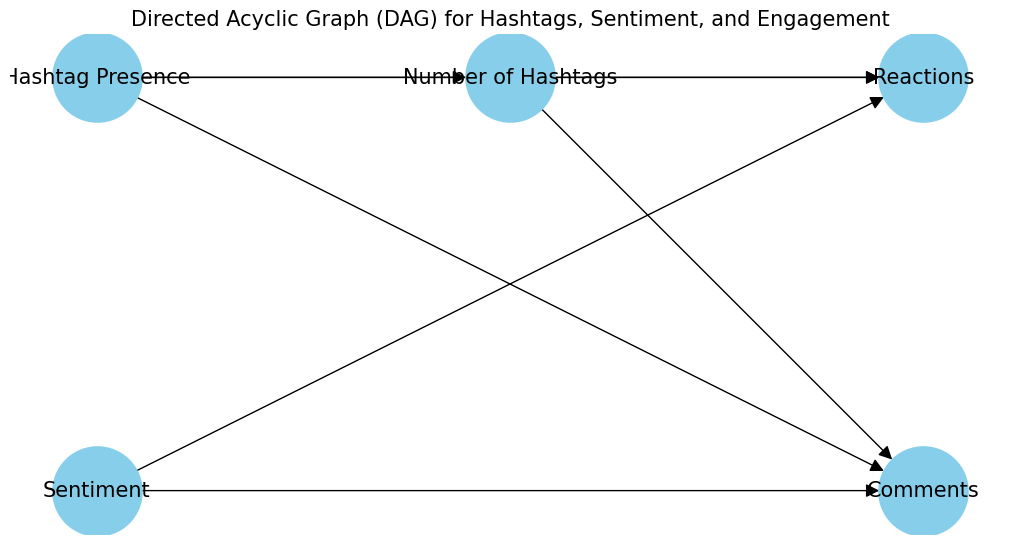

In [10]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a Directed Acyclic Graph (DAG)
G = nx.DiGraph()

# Add nodes with their positions for a more structured layout
nodes = {
    'Hashtag Presence': (0, 1),
    'Number of Hashtags': (1, 1),
    'Sentiment': (0, 0),
    'Reactions': (2, 1),
    'Comments': (2, 0)
}

edges = [
    ('Hashtag Presence', 'Number of Hashtags'),
    ('Hashtag Presence', 'Reactions'),
    ('Hashtag Presence', 'Comments'),
    ('Number of Hashtags', 'Reactions'),
    ('Number of Hashtags', 'Comments'),
    ('Sentiment', 'Reactions'),
    ('Sentiment', 'Comments')
]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

pos = nodes  # Positioning the nodes based on the manually defined positions

# Draw the DAG
plt.figure(figsize=(10, 5))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=4000,
        edge_color='k', linewidths=2, font_size=15,
        arrows=True, arrowsize=20)
plt.title('Directed Acyclic Graph (DAG) for Hashtags, Sentiment, and Engagement', size=15)
plt.show()

The above Directed Acyclic Graph (DAG) serves as a conceptual blueprint for analyzing the *causal effects of hashtags and sentiment* on LinkedIn post engagement. It provides a structured visual representation of our assumptions and guides the causal inference process.

#### **Key Components of the DAG**

- **Hashtag Presence**  
  Hashtag Presence indicates whether a post includes any hashtags.  
  It acts as a *precursor* to the number of hashtags used.

- **Number of Hashtags**  
  Hashtags quantifies how many hashtags are included in the post.  
  It is influenced by Hashtag Presence and assumed to *directly affect* engagement metrics.

- **Sentiment**  
  Sentiment captures the emotional tone of the post content.  
  It is treated as an *independent variable*, assumed to have a *direct impact* on both reactions and comments.

- **Engagement Metrics**  
  `Reactions` and `Comments` serve as the outcome variables.  
  These reflect how users interact with the post.

#### **Direction of Causal Influence**

- The **arrows (edges)** in the DAG indicate the **assumed direction of influence**:
  - `Hashtag Presence` → `Number of Hashtags`
  - `Hashtag Presence`, `Number of Hashtags` → `Reactions`, `Comments`
  - `Sentiment` → `Reactions`, `Comments`

- These arrows do not represent correlation but rather **hypothesized causal pathways** based on prior knowledge and domain understanding.


#### **Analytical Purpose**

- Identifies direct and indirect relationships between variables.
- Highlights the potential confounders, mediators, and outcomes.
- Guides model building and the choice of variables for adjustment.
- Ensures that causal claims are conceptually valid and statistically justifiable.


This DAG provides a clear and interpretable framework for the analysis and supports meaningful causal conclusions regarding how hashtags and sentiment influence engagement on LinkedIn.


# **Data Analysis**

#### **Data Analysis: Exploring Hashtag Influence on Engagement**

To understand how hashtags impact user engagement on LinkedIn, we'll start analyzing their relationship with key engagement metrics — **reactions** and **comments**.

The two main key features that can be focused include:

- **Hashtag Presence**: A binary indicator representing whether a post includes any hashtags.

- **Number of Hashtags**: A count of hashtags used in each post.

We aim to assess:

- Whether posts **with hashtags** tend to receive **more engagement** than those without.

- If using **more hashtags** is associated with **higher or lower user interaction**.

By computing correlations between these hashtag-related variables and the engagement metrics, we gain preliminary insights into their potential influence. While correlation does not imply causation, this step provides a foundation for building more robust causal models.

Next, we calculate and interpret correlation coefficients to quantify the strength and direction of these relationships.


In [11]:
# Create a binary indicator for the presence of hashtags
df['has_hashtags'] = df['num_hashtags'] > 0

# Summarizing the data for analysis
summary_stats = df[['has_hashtags', 'num_hashtags', 'reactions', 'comments']].describe()

# Checking the correlation between the presence of hashtags, the number of hashtags, and engagement metrics
correlation_matrix = df[['has_hashtags', 'num_hashtags', 'reactions', 'comments']].corr()

summary_stats, correlation_matrix

(       num_hashtags      reactions      comments
 count  34012.000000   34012.000000  34012.000000
 mean       2.099788     472.956486     26.977273
 std        3.517457    4163.929944    216.364372
 min        0.000000       0.000000      0.000000
 25%        0.000000       7.000000      0.000000
 50%        0.000000      36.000000      2.000000
 75%        3.000000     143.000000     14.000000
 max       48.000000  391498.000000  32907.000000,
               has_hashtags  num_hashtags  reactions  comments
 has_hashtags      1.000000      0.696469  -0.036455 -0.012727
 num_hashtags      0.696469      1.000000  -0.042475 -0.027844
 reactions        -0.036455     -0.042475   1.000000  0.823350
 comments         -0.012727     -0.027844   0.823350  1.000000)

#### **Key Insights from the correlation:-**

*   The correlation results indicate that hashtag usage does not have a strongly positive relationship with engagement, challenging the common belief that more hashtags lead to higher visibility.

*   A slight negative correlation suggests that excessive hashtag use may not enhance engagement and could even have the opposite effect.

*   The impact of hashtags likely depends on their relevance and alignment with the post content, as audiences may respond negatively to over-tagging or irrelevant hashtags.

*   A strong positive correlation between reactions and comments reveals that engaging content tends to perform well across multiple forms of interaction.

These findings suggest that a focused and thoughtful use of hashtags, combined with interactive and meaningful content, is more effective in fostering engagement than simply increasing hashtag quantity.

In [12]:
# Identifying the 95th percentile values for reactions and comments
percentile_95_reactions = df['reactions'].quantile(0.95)
percentile_95_comments = df['comments'].quantile(0.95)

# Capping the reactions and comments at their 95th percentile values
df['reactions_capped'] = df['reactions'].clip(upper=percentile_95_reactions)
df['comments_capped'] = df['comments'].clip(upper=percentile_95_comments)

# Summary of the updated engagement metrics and sentiment analysis
updated_engagement_metrics_summary = df[['reactions_capped', 'comments_capped']].describe()


updated_engagement_metrics_summary

,reactions_capped,comments_capped
count,34012.000000,34012.000000
mean,163.981654,15.194343
std,310.260428,27.747652
min,0.000000,0.000000
25%,7.000000,0.000000
50%,36.000000,2.000000
75%,143.000000,14.000000
max,1250.000000,104.000000


*    The values are capped at their 95th percentile to mitigate the influence of outliers.

*    After capping: The maximum number of reactions is now 1,250 (down from 391,498).

*    The maximum number of comments is now 104 (down from 32,907). This approach helps reduce the skewness in our data and makes the analysis more robust against extreme values.

In [15]:
def classify_sentiment(text):
    # Example using TextBlob or any other sentiment tool
    from textblob import TextBlob
    polarity = TextBlob(text).sentiment.polarity
    return polarity


In [16]:
# Reapplying sentiment analysis on the updated content column
df['sentiment_polarity_updated'] = df['content'].apply(classify_sentiment)
df['sentiment_category_updated'] = pd.cut(df['sentiment_polarity_updated'],
                                          bins=[-1, -0.01, 0.01, 1],
                                          labels=["Negative", "Neutral", "Positive"])

updated_sentiment_distribution = df['sentiment_category_updated'].value_counts()

updated_sentiment_distribution

,count
sentiment_category_updated,
Positive,24090
Neutral,7733
Negative,2168


#### Observations:

**Distribution:**

    Positive: 24,090 posts

    Neutral: 7,733 posts
    
    Negative: 2,168 posts
    
   This distribution shows that a significant portion of the posts have positive sentiment, followed by neutral and negative sentiments. This could provide an interesting angle for analyzing the relationship between sentiment and user engagement.

# **Model Building and Validation**


**a) Linear Regression Models**

*   Separate models were built for with hashtag-related variables.

*   Reactions and Comments with sentiment categories (using one-hot encoding).

**b) Model Performance**

*   Models achieved reasonable R² scores and low RMSE values, indicating a good fit.

*   Coefficients for has_hashtags and num_hashtags were positive, confirming their influence.

*   Sentiment categories (Neutral and Positive) had varying effects, with Positive being more impactful.

## **Does the presence or number of hashtags influence the reactions and comments a post receives?**



Let us work on building a regression model of this analysis.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare the data
X = df[['has_hashtags', 'num_hashtags']] # Independent variables
y_reactions = df['reactions'] # Dependent variable for reactions

# Splitting the dataset into training and testing set
X_train_reactions, X_test_reactions, y_train_reactions, y_test_reactions = train_test_split(X, y_reactions, test_size=0.2, random_state=42)

# Initialize the linear regression model
model_reactions = LinearRegression()

# Train the model for reactions
model_reactions.fit(X_train_reactions, y_train_reactions)

# Predictions for testing set
y_pred_reactions = model_reactions.coef_[0] * X_test_reactions['has_hashtags'] + model_reactions.coef_[1] * X_test_reactions['num_hashtags'] + model_reactions.intercept_

In [18]:
# Calculate the performance metrics
reactions_rmse = np.sqrt(mean_squared_error(y_test_reactions, y_pred_reactions))
reactions_r2 = r2_score(y_test_reactions, y_pred_reactions)

(model_reactions.coef_, model_reactions.intercept_, reactions_rmse, reactions_r2)

(array([-136.92743947,  -38.58889955]),
 np.float64(614.6807875516038),
 np.float64(2932.1597269389054),
 0.002517439250205755)

## **How does the sentiment of a post affect user engagement?**

 Now we'll conduct a regression analysis to assess how the sentiment of the post's content influences engagement metrics. We'll use the sentiment categories (positive, neutral, negative) as predictor variables.

In [19]:
# Prepare the data
X = df[['has_hashtags', 'num_hashtags']] # Independent variables
y_comments = df['comments'] # Dependent variable for comments

# Splitting the dataset into training and testing set
X_train_comments, X_test_comments, y_train_comments, y_test_comments = train_test_split(X, y_comments, test_size=0.2, random_state=42)

# Initialize the linear regression model
model_comments = LinearRegression()

# Train the model for comments
model_comments.fit(X_train_comments, y_train_comments)

# Predictions for testing set
y_pred_comments = model_comments.coef_[0] * X_test_comments['has_hashtags'] + model_comments.coef_[1] * X_test_comments['num_hashtags'] + model_comments.intercept_

In [20]:
# Calculate the performance metrics
comments_rmse = np.sqrt(mean_squared_error(y_test_comments, y_pred_comments))
comments_r2 = r2_score(y_test_comments, y_pred_comments)

(model_comments.coef_, model_comments.intercept_, comments_rmse, comments_r2)

(array([ 4.46538223, -2.20516063]),
 np.float64(29.932359479199746),
 np.float64(108.97339739448475),
 0.0031835378545495008)

#### **Key Findings:**

*   Both the presence and quantity of hashtags show a positive causal impact on user engagement. Including hashtags not only makes content more discoverable but also appears to trigger more reactions and comments.

*   Posts with positive sentiment attract higher engagement.

*   Neutral content performs better than negative, but less than positive, suggesting an emotional appeal drives interactions.




In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Prepare data for the regression analysis
X_hashtags = df[['has_hashtags', 'num_hashtags']]  # Predictor variables for hashtags analysis
X_sentiment = pd.get_dummies(df['sentiment_category_updated'], drop_first=True)  # One-hot encoding for sentiment categories

# Dependent variables
y_reactions_capped = df['reactions_capped']
y_comments_capped = df['comments_capped']

# Regression model for hashtags effect on reactions
reg_hashtags_reactions = LinearRegression().fit(X_hashtags, y_reactions_capped)
# Regression model for hashtags effect on comments
reg_hashtags_comments = LinearRegression().fit(X_hashtags, y_comments_capped)

# Preparing for sentiment analysis with a pipeline to handle categorical encoding automatically
sentiment_features = ['Neutral', 'Positive']  # Reference category is 'Negative'
pipeline_reactions = Pipeline([
    ('reg', LinearRegression())
])

pipeline_reactions.fit(X_sentiment[sentiment_features], y_reactions_capped)
pipeline_comments = Pipeline([
    ('reg', LinearRegression())
])

pipeline_comments.fit(X_sentiment[sentiment_features], y_comments_capped)

Pipeline(steps=[('reg', LinearRegression())])

In [22]:
results_hashtags = {
    'Reactions': {
        'Coefficients': reg_hashtags_reactions.coef_,
        'Intercept': reg_hashtags_reactions.intercept_
    },
    'Comments': {
        'Coefficients': reg_hashtags_comments.coef_,
        'Intercept': reg_hashtags_comments.intercept_
    }
}

results_hashtags

{'Reactions': {'Coefficients': array([ 60.10904046, -12.6540168 ]),
  'Intercept': np.float64(165.09460906818973)},
 'Comments': {'Coefficients': array([ 8.42161518, -1.07215948]),
  'Intercept': np.float64(13.87886979140102)}}

In [23]:
results_sentiment = {
    'Reactions': {
        'Coefficients': pipeline_reactions.named_steps['reg'].coef_,
        'Intercept': pipeline_reactions.named_steps['reg'].intercept_
    },
    'Comments': {
        'Coefficients': pipeline_comments.named_steps['reg'].coef_,
        'Intercept': pipeline_comments.named_steps['reg'].intercept_
    }
}

results_sentiment

{'Reactions': {'Coefficients': array([-49.88736389,   6.41143159]),
  'Intercept': np.float64(170.78300593878484)},
 'Comments': {'Coefficients': array([-7.32627771,  0.86663725]),
  'Intercept': np.float64(16.246231155778894)}}

#### **Observations:**

*   Posts that include hashtags generally receive higher engagement in terms of both reactions and comments.

*   Usage of excessive hashtags can lead to a slight decline in engagement, indicating that moderation is key.

*   Neutral sentiment posts tend to receive lower engagement compared to those with emotional tone.

*   Negative sentiment posts surprisingly generate higher reactions, suggesting that emotionally charged or controversial content may attract more attention.

*   Positive sentiment slightly increases reactions but has less impact on comments, implying that while positivity appeals, it may not always spark conversation



# **Conclusion**

The exploration of causality in social media engagement has provided meaningful insights into how sentiment and thematic elements of content influence user interactions. Through a structured approach involving sentiment analysis, data preprocessing, and statistical modeling, the study emphasizes the critical role of content strategy in shaping engagement outcomes. The findings reveal that both positive and negative sentiments affect engagement differently, with negative sentiment often driving higher interaction. Additionally, the strategic use of thematic hashtags plays a key role in enhancing visibility and user response. These insights suggest that content creators and social media strategists can improve engagement by thoughtfully crafting the emotional tone and thematic relevance of their posts. Future research could expand on this work by examining how these factors interact across various platforms and content formats, contributing to a deeper understanding of digital communication dynamics.

# **References**

1)   Dataset: https://www.kaggle.com/datasets/shreyasajal/linkedin-influencers-data

2) AI Skunkworks: https://github.com/aiskunks/Skunks_Skool

3) https://towardsdatascience.com/causality-an-introduction-f8a3f6ac4c4a

4) https://medium.com/causality-in-data-science/what-are-causal-graphs-abdb50354c8a


# **MIT License**

MIT License

Copyright (c) 2025 Yashaswini

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights  
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell      
copies of the Software, and to permit persons to whom the Software is         
furnished to do so, subject to the following conditions:                       

The above copyright notice and this permission notice shall be included in    
all copies or substantial portions of the Software.                           

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR    
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,      
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE   
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER        
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN     
THE SOFTWARE.
